In [40]:
import geopandas as gpd
import pandas as pd
import numpy as np

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import os
import sys
module_path = os.path.abspath(os.path.join('../../../'))
if module_path not in sys.path:
    sys.path.append(module_path)
    import aup

In [41]:
city = 'Guadalajara'
metro_schema = 'metropolis'
metro_table = 'metro_gdf_2020'

In [42]:
query = f"SELECT * FROM {metro_schema}.{metro_table} WHERE \"city\" LIKE \'{city}\'"
metro_gdf = aup.gdf_from_query(query, geometry_col='geometry')
#metro_gdf = metro_gdf.set_crs("EPSG:4326")

### Download network

In [43]:
type = "urban"
query_urban = f"SELECT * FROM hexgrid.hexgrid_8_city_2020 WHERE \"city\" LIKE \'{city}\' AND \"type\" LIKE \'{type}\'"
query_urban

'SELECT * FROM hexgrid.hexgrid_8_city_2020 WHERE "city" LIKE \'Guadalajara\' AND "type" LIKE \'urban\''

In [44]:
hex_gdf = aup.gdf_from_query(query_urban, geometry_col='geometry')
print(hex_gdf.shape)
hex_gdf.head(2)

(1132, 6)


,hex_id_8,geometry,CVEGEO,NOMGEO,city,type
0,88498c9421fffff,"POLYGON ((-103.28663 20.69309, -103.28209 20.6...",14039,Guadalajara,Guadalajara,urban
1,88498c9405fffff,"POLYGON ((-103.30025 20.68392, -103.29571 20.6...",14039,Guadalajara,Guadalajara,urban


<Axes: >

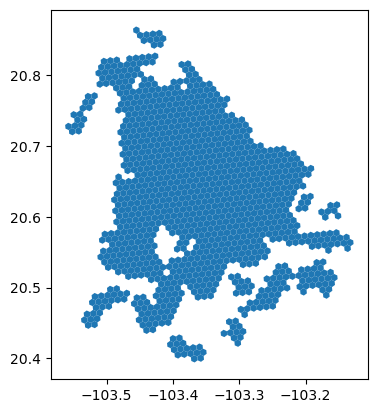

In [69]:
hex_gdf.plot()

<Axes: >

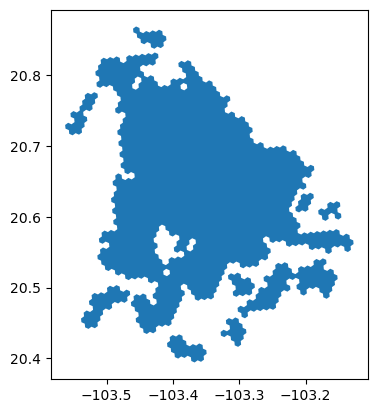

In [70]:
hex_gdf.dissolve().plot()

<Axes: >

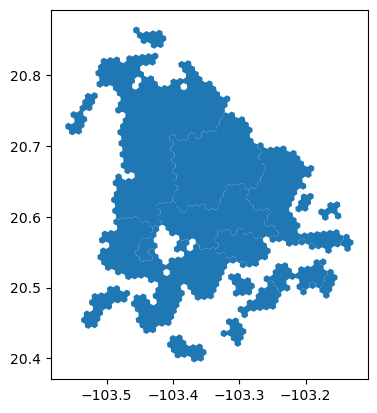

In [71]:
hex_gdf.dissolve(by = "NOMGEO").plot()

In [45]:
_, nodes, edges = aup.graph_from_hippo(hex_gdf, schema='osmnx', edges_folder='edges_osmnx_23_line', nodes_folder='nodes_osmnx_23_point')

In [7]:
print(nodes.shape)
nodes.head(2)

(173686, 5)


,x,y,street_count,geometry,city
osmid,,,,,
28751344,-103.306309,20.711533,3,POINT (-103.30631 20.71153),Guadalajara
28753224,-103.316645,20.700650,3,POINT (-103.31665 20.70065),Guadalajara


<Axes: >

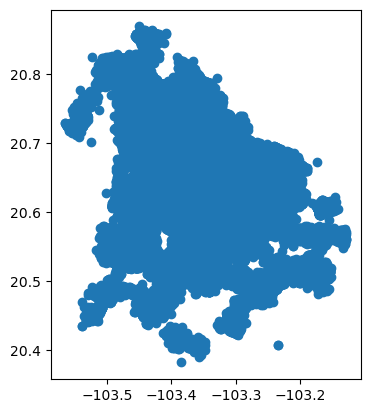

In [74]:
nodes.plot()

In [75]:
nodes.isna().sum()

x               0
y               0
street_count    0
geometry        0
city            0
dtype: int64

In [76]:
print(edges.shape)
edges.head(2)

(414636, 16)


,,,osmid,oneway,lanes,name,highway,maxspeed,length,geometry,bridge,ref,junction,tunnel,access,width,service,city
u,v,key,,,,,,,,,,,,,,,,
4303977502,4303977514,0,431149558,True,None,None,residential,None,147.496,"LINESTRING (-103.50987 20.45796, -103.51121 20...",None,None,None,None,private,None,None,Guadalajara
4303977503,4303977514,0,431149502,True,None,None,residential,None,49.994,"LINESTRING (-103.51136 20.45798, -103.51121 20...",None,None,None,None,private,None,None,Guadalajara


In [46]:
edges = edges.reset_index()
edges

,u,v,key,osmid,oneway,lanes,name,highway,maxspeed,length,geometry,bridge,ref,junction,tunnel,access,width,service,city
0,4303977502,4303977514,0,431149558,True,None,None,residential,None,147.496,"LINESTRING (-103.50987 20.45796, -103.51121 20...",None,None,None,None,private,None,None,Guadalajara
1,4303977503,4303977514,0,431149502,True,None,None,residential,None,49.994,"LINESTRING (-103.51136 20.45798, -103.51121 20...",None,None,None,None,private,None,None,Guadalajara
2,4303977508,4303977503,0,431149546,True,None,None,residential,None,65.457,"LINESTRING (-103.51195 20.45817, -103.51136 20...",None,None,None,None,private,None,None,Guadalajara
3,4303977517,4303977508,0,431149546,True,None,None,residential,None,107.109,"LINESTRING (-103.51292 20.45849, -103.51195 20...",None,None,None,None,private,None,None,Guadalajara
4,4303977519,4303977505,0,431149521,True,None,None,residential,None,204.005,"LINESTRING (-103.51055 20.45850, -103.51005 20...",None,None,None,None,private,None,None,Guadalajara
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414631,8669578133,8432758360,0,908170488,False,None,caminos de aceso,footway,None,20.283,"LINESTRING (-103.38285 20.52314, -103.38289 20...",None,None,None,None,None,None,None,Guadalajara
414632,8753025784,1754556621,0,163775733,False,None,Calle Centauro,residential,None,29.389,"LINESTRING (-103.38244 20.52586, -103.38216 20...",None,None,None,None,None,None,None,Guadalajara
414633,8760908969,6142976278,0,908170483,False,None,Veredas del parque,footway,None,46.802,"LINESTRING (-103.38288 20.52434, -103.38289 20...",None,None,None,None,None,None,None,Guadalajara
414634,8776316843,1754154719,0,163737788,True,None,Boulevard América del Sur,residential,None,2.927,"LINESTRING (-103.38176 20.51301, -103.38179 20...",None,None,None,None,None,None,None,Guadalajara


In [78]:
edges.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 414636 entries, 0 to 414635
Data columns (total 19 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   u         414636 non-null  int64   
 1   v         414636 non-null  int64   
 2   key       414636 non-null  int64   
 3   osmid     414636 non-null  object  
 4   oneway    414636 non-null  bool    
 5   lanes     59751 non-null   object  
 6   name      275498 non-null  object  
 7   highway   414636 non-null  object  
 8   maxspeed  11463 non-null   object  
 9   length    414636 non-null  float64 
 10  geometry  414636 non-null  geometry
 11  bridge    1312 non-null    object  
 12  ref       2811 non-null    object  
 13  junction  2315 non-null    object  
 14  tunnel    344 non-null     object  
 15  access    47914 non-null   object  
 16  width     973 non-null     object  
 17  service   3841 non-null    object  
 18  city      414636 non-null  object  
dtypes: bool(1), flo

<Axes: >

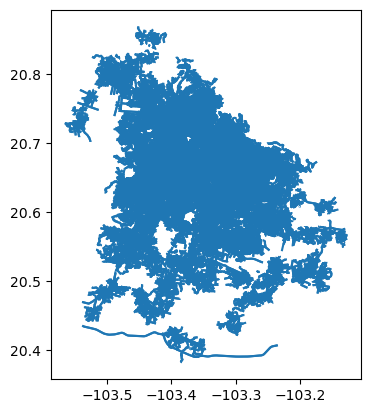

In [79]:
edges.plot()

In [80]:
edges.isna().sum()

u                0
v                0
key              0
osmid            0
oneway           0
lanes       354885
name        139138
highway          0
maxspeed    403173
length           0
geometry         0
bridge      413324
ref         411825
junction    412321
tunnel      414292
access      366722
width       413663
service     410795
city             0
dtype: int64

### Calcular el área de cada polígono de voronoi en metros cuadrados

In [47]:
# Paso 1: Cargar y definir el área de interés (AOI) para la ciudad
aup.log("--- LOADING CITY POP DATA.")    
city_gdf = metro_gdf.loc[metro_gdf.city == city]
city_gdf = city_gdf.set_crs("EPSG:4326")  # Asegurar que la proyección inicial sea EPSG:4326 (lat/lon)
aoi = city_gdf.dissolve()

# Paso 2: Transformar el AOI a una proyección en metros para trabajar con los polígonos de Voronoi
target_crs = "EPSG:6372"  # CRS en metros, adecuado para México
aoi = aoi.to_crs(target_crs)
aup.log(f"--- Area of Interest (AOI) proyectada a {target_crs}.")

# Paso 1: Cargar y transformar polígonos de Voronoi y nodos a la proyección en metros
aup.log("--- Loading and transforming Voronoi polygons and nodes to meters.")
voronoi_gdf = gpd.read_file('/home/jovyan/accesibilidad-urbana/data/external/Guadalajara_script22_voronoipolys.gpkg').to_crs(target_crs)
nodes_gdf = gpd.read_file('/home/jovyan/accesibilidad-urbana/data/external/Guadalajara_script22_nodes.gpkg').to_crs(target_crs)

# Paso 3: Calcular el área de cada polígono de Voronoi
voronoi_gdf['area_ha'] = voronoi_gdf.geometry.area / 10000  # Calcula el área en metros cuadrados
aup.log("--- Área calculada para cada polígono de Voronoi en metros cuadrados.")



In [48]:
nodes_gdf.head(2)

,osmid,pobtot,pobfem,pobmas,p_0a2,p_0a2_f,p_0a2_m,p_3a5,p_3a5_f,p_3a5_m,...,p_15ymas_m,p_18ymas,p_18ymas_f,p_18ymas_m,pob0_14,pob15_64,pob65_mas,pcon_disc,city,geometry
0,28751344,74.890169,39.475573,35.414596,4.052830,2.794774,1.258056,3.547978,2.176828,1.371150,...,28.409572,55.442126,28.343083,27.099043,16.518011,52.241580,6.130578,2.055585,Guadalajara,POINT (2364502.909 967746.052)
1,28753224,180.215453,94.978818,85.236635,4.968364,3.053272,1.915092,6.664361,2.904487,3.759874,...,68.644687,134.938995,71.333002,63.605993,35.514429,119.215103,25.485921,5.448743,Guadalajara,POINT (2363419.738 966556.114)


In [ ]:
voronoi_gdf.head()

<Axes: >

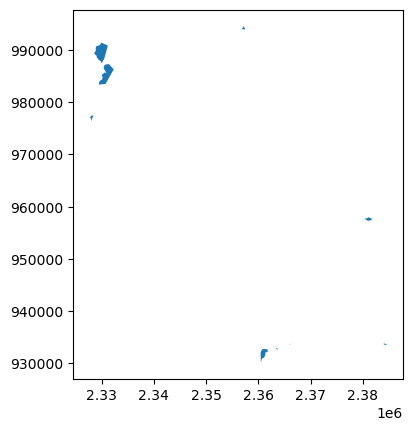

In [84]:
voronoi_gdf.iloc[:10].plot()

In [85]:
voronoi_gdf.shape

(187139, 3)

In [38]:
nodes_gdf.shape

(160369, 3)

In [39]:
nodes.shape

(173686, 5)

In [49]:
zero_area_voronoi = voronoi_gdf[voronoi_gdf['area_ha'] == 0]
print(zero_area_voronoi)

Empty GeoDataFrame
Columns: [osmid, geometry, area_ha]
Index: []


### Asignar los nodos a cada polígono

In [52]:
target_crs = "EPSG:6372"  # Proyección en metros para cálculos de área
voronoi_gdf = voronoi_gdf.to_crs(target_crs)
nodes_gdf = nodes_gdf.to_crs(target_crs)

nodes_gdf = nodes_gdf[["pobtot", "geometry","osmid"]]

# Realiza el merge para unir los datos de población y área desde `voronoi_gdf` a `nodes_gdf` basado en "osmid"
nodespob = nodes_gdf.merge(
    voronoi_gdf[['osmid', 'area_ha']],  # Selecciona solo las columnas necesarias de voronoi_gdf
    on='osmid',
    how='left'
    )

# Verifica las primeras filas para asegurarte de que el merge se realizó correctamente
nodespob.head(3)

,pobtot,geometry,osmid,area_ha
0,74.890169,POINT (2364502.909 967746.052),28751344,0.481911
1,180.215453,POINT (2363419.738 966556.114),28753224,0.733155
2,58.046111,POINT (2364391.218 967415.621),28757751,1.002558


In [51]:
matched_osmid = nodes_gdf['osmid'].isin(voronoi_gdf['osmid'])
print(f"Coincidencias de osmid: {matched_osmid.sum()} / {len(nodes_gdf)}")

Coincidencias de osmid: 160369 / 160369


In [118]:
nodespob.isnull().sum()

pobtot      0
geometry    0
osmid       0
area_ha     0
dtype: int64

In [126]:
edges.isna().sum()

u                0
v                0
key              0
osmid            0
oneway           0
lanes       354885
name        139138
highway          0
maxspeed    403173
length           0
geometry         0
bridge      413324
ref         411825
junction    412321
tunnel      414292
access      366722
width       413663
service     410795
city             0
dtype: int64

In [25]:
# Combinar para obtener los datos del nodo de origen 'u'
edges_with_u = edges.merge(
    nodespob[['osmid', 'pobtot', 'area_ha']], 
    left_on='u',  # Une usando la columna 'u' de edges
    right_on='osmid',  # Une con la columna 'osmid' de nodes_gdf
    how='left'  # Mantiene todas las filas de edges
).rename(columns={'pobtot': 'pobtot_u', 'area_ha': 'area_ha_u'})  # Renombra columnas para evitar conflictos

# Combinar para obtener los datos del nodo de destino 'v'
edges_with_uv = edges_with_u.merge(
    nodespob[['osmid', 'pobtot', 'area_ha']], 
    left_on='v',  # Une usando la columna 'v' de edges
    right_on='osmid',  # Une con la columna 'osmid' de nodes_gdf
    how='left'  # Mantiene todas las filas de edges_with_u
).rename(columns={'pobtot': 'pobtot_v', 'area_ha': 'area_ha_v'})  # Renombra columnas para evitar conflictos


In [26]:
print(edges_with_uv.shape)
edges_with_uv.head(5)

(414636, 25)


,u,v,key,osmid_x,oneway,lanes,name,highway,maxspeed,length,...,access,width,service,city,osmid_y,pobtot_u,area_ha_u,osmid,pobtot_v,area_ha_v
0,4303977502,4303977514,0,431149558,True,None,None,residential,None,147.496,...,private,None,None,Guadalajara,NaN,NaN,NaN,NaN,NaN,NaN
1,4303977503,4303977514,0,431149502,True,None,None,residential,None,49.994,...,private,None,None,Guadalajara,NaN,NaN,NaN,NaN,NaN,NaN
2,4303977508,4303977503,0,431149546,True,None,None,residential,None,65.457,...,private,None,None,Guadalajara,NaN,NaN,NaN,NaN,NaN,NaN
3,4303977517,4303977508,0,431149546,True,None,None,residential,None,107.109,...,private,None,None,Guadalajara,NaN,NaN,NaN,NaN,NaN,NaN
4,4303977519,4303977505,0,431149521,True,None,None,residential,None,204.005,...,private,None,None,Guadalajara,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
edges_with_uv[['u', 'v', "osmid_y", "geometry", "pobtot_u", "pobtot_v"]]

,u,v,osmid_y,geometry,pobtot_u,pobtot_v
0,4303977502,4303977514,NaN,"LINESTRING (-103.50987 20.45796, -103.51121 20...",NaN,NaN
1,4303977503,4303977514,NaN,"LINESTRING (-103.51136 20.45798, -103.51121 20...",NaN,NaN
2,4303977508,4303977503,NaN,"LINESTRING (-103.51195 20.45817, -103.51136 20...",NaN,NaN
3,4303977517,4303977508,NaN,"LINESTRING (-103.51292 20.45849, -103.51195 20...",NaN,NaN
4,4303977519,4303977505,NaN,"LINESTRING (-103.51055 20.45850, -103.51005 20...",NaN,NaN
...,...,...,...,...,...,...
414631,8669578133,8432758360,NaN,"LINESTRING (-103.38285 20.52314, -103.38289 20...",NaN,0.874733
414632,8753025784,1754556621,8.753026e+09,"LINESTRING (-103.38244 20.52586, -103.38216 20...",42.947037,17.999554
414633,8760908969,6142976278,NaN,"LINESTRING (-103.38288 20.52434, -103.38289 20...",NaN,NaN
414634,8776316843,1754154719,8.776317e+09,"LINESTRING (-103.38176 20.51301, -103.38179 20...",4.381242,11.597057


<Axes: >

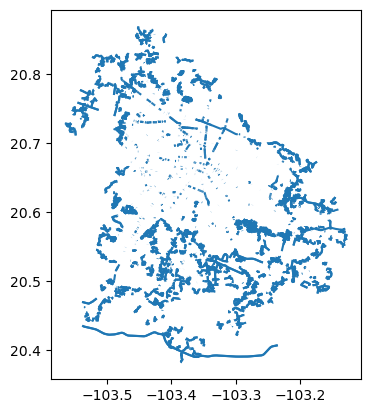

In [37]:
edges_with_uv.loc[(edges_with_uv.pobtot_u.isna())&(edges_with_uv.pobtot_v.isna())].plot()

In [27]:
edges_with_uv.columns

Index(['u', 'v', 'key', 'osmid_x', 'oneway', 'lanes', 'name', 'highway',
       'maxspeed', 'length', 'geometry', 'bridge', 'ref', 'junction', 'tunnel',
       'access', 'width', 'service', 'city', 'osmid_y', 'pobtot_u',
       'area_ha_u', 'osmid', 'pobtot_v', 'area_ha_v'],
      dtype='object')

In [19]:
# Calcular la densidad de cada nodo
edges_with_uv['density_u'] = edges_with_uv['pobtot_u'] / edges_with_uv['area_ha_u']
edges_with_uv['density_v'] = edges_with_uv['pobtot_v'] / edges_with_uv['area_ha_v']
edges_with_uv["average_population"] = (edges_with_uv['pobtot_u'] + edges_with_uv['pobtot_v']) / 2
edges_with_uv["total_pobtot"] = edges_with_uv['pobtot_u'] + edges_with_uv['pobtot_v']

# Calcular la densidad promedio para cada arista (promedio de los nodos u y v)
edges_with_uv['average_density'] = (edges_with_uv['density_u'] + edges_with_uv['density_v']) / 2


In [20]:
zero_area = nodespob[nodespob['area_ha'] == 0]
print(zero_area)

Empty GeoDataFrame
Columns: [pobtot, geometry, osmid, area_ha]
Index: []


In [21]:
edges_with_uv = edges_with_uv[['u', 'v', 'density_u', 'density_v', 'average_density', "average_population", "total_pobtot", "geometry"]]
edges_with_uv.head()

,u,v,density_u,density_v,average_density,average_population,total_pobtot,geometry
0,4303977502,4303977514,NaN,NaN,NaN,NaN,NaN,"LINESTRING (-103.50987 20.45796, -103.51121 20..."
1,4303977503,4303977514,NaN,NaN,NaN,NaN,NaN,"LINESTRING (-103.51136 20.45798, -103.51121 20..."
2,4303977508,4303977503,NaN,NaN,NaN,NaN,NaN,"LINESTRING (-103.51195 20.45817, -103.51136 20..."
3,4303977517,4303977508,NaN,NaN,NaN,NaN,NaN,"LINESTRING (-103.51292 20.45849, -103.51195 20..."
4,4303977519,4303977505,NaN,NaN,NaN,NaN,NaN,"LINESTRING (-103.51055 20.45850, -103.51005 20..."


In [22]:
edges_with_uv.isna().sum()

u                         0
v                         0
density_u             30488
density_v             30471
average_density       36120
average_population    36120
total_pobtot          36120
geometry                  0
dtype: int64

In [160]:
edges_with_uv.dropna(inplace = True)

/tmp/ipykernel_2476/3560604630.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edges_with_uv.dropna(inplace = True)


In [161]:
edges_with_uv.isna().sum()

u                     0
v                     0
density_u             0
density_v             0
average_density       0
average_population    0
total_pobtot          0
geometry              0
dtype: int64

<Axes: xlabel='average_density'>

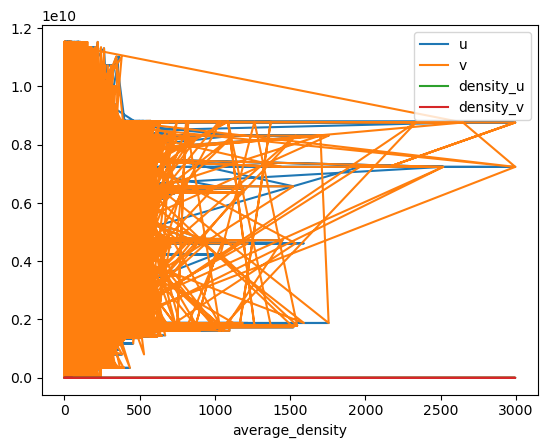

In [149]:
edges_with_uv.plot("average_density")

In [162]:
edges_with_uv.head()

,u,v,density_u,density_v,average_density,average_population,total_pobtot,geometry
18,8411312708,4303977515,1.810910,0.196386,1.003648,1.703459,3.406918,POINT (2342632.144 940064.023)
20,1759229275,1830419048,26.603322,11.876401,19.239861,4.246741,8.493481,POINT (2350028.468 939257.304)
21,1830419040,1830419059,8.073501,3.568242,5.820872,1.261840,2.523681,POINT (2350151.547 939295.830)
22,1830419044,1830419048,9.357885,11.876401,10.617143,1.890002,3.780004,POINT (2350028.468 939257.304)
23,1830419048,1830419074,11.876401,4.606107,8.241254,1.389213,2.778427,POINT (2350047.709 939391.928)
